# Employee Exit Survey

# Table of Contents

- [Introduction](#intro)
- [Reading Data Sets](#read)
- [Exploring dataset for missing values ](#missing)
- [Cleaning Column Names](#columns)
- [What are the reasons for termination of employee???](#cease)
- [Verifying the data](#verify)
- [Updates in Dete Survey](#update)
- [Identifying Dissatisfied Employees](#dissatified)
- [CombinIng the data](#combine)
- [Cleaning the Service Column](#service)
- [What we found!](#findings)
- [Dissatisfaction based on the AGE_FACTOR](#age)
- [Conclusion](#conclude)


# Introduction<a id="intro"></a>

We will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
DETE exit suvey data [Link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

As a data analyst, we will analyze the data to find certain results that tells about the cause and reason that employee are exiting from the company.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The - length of the person's employment (in years)

# Reading Data sets <a id="read"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
# files imported into pandas dataframe

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

dete_survey has 56 columns and 822 rows of entries

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['Position'].value_counts()
# count number of entries based on df['Position'] field

Position
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Deputy Principal                                             4
Business Service Manager                                     4
Name: count, dtype: int64

Based on Position, there are 324 entries for Teacher which are highest, which says Teaching profession is where people have more exits. 
The lowest entries are for fields like Professional staff, Officer, School Principal, Deputy Principal, or Business Service Manager, where there are lesser numbers of exits.

In [6]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Highest null values are seen for Aboriginal, Torres Strait, South Sea, Disability, NESB, Business unit, and Classification columns. 

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

tafe_survey has 72 columns and 702 rows of entries.

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey['WorkArea'].value_counts()

WorkArea
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: count, dtype: int64

The data set is divided into two work areas, 1, non-delivery(corporate), and another one is Delivery(teaching). There are more people in the Corporate houses who are exiting from their work.

In [11]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

- CurrentAge. Current Age                                                      106
- Employment Type. Employment Type                                             106
- Classification. Classification                                               106
- LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
- LengthofServiceCurrent. Length of Service at current workplace (in years)    106

are the columns with values missing in numbers.

# Exploring dataset for missing values <a id="missing"></a>

In [13]:
# reading dataset dete_survey.csv once again to set the missing values of the data set with 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
# the "Not Stated" arguement sets values with NaN

In [14]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
# dropping columns we won't use in our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
# axis=1 for dropping by column name, not row index

In [16]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Now we are left with 35 columns to work with.

In [17]:
# Now dropping columns that we will not work with tafe_survey dataset
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [18]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Now we are only left with 23 columns for tafe_survey_updated to work with the dataset.

# Cleaning Column Names <a id="columns"></a>

In [19]:
# updating column names in dete_survey_updated

dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.upper()
# replacing the white space with underscore
# removing the trailing white spaces or leading ones
# converting into uppercase

In [20]:
dete_survey_updated.head(0)

,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,WORK_LIFE_BALANCE,WORKLOAD,NONE_OF_THE_ABOVE,GENDER,AGE,ABORIGINAL,TORRES_STRAIT,SOUTH_SEA,DISABILITY,NESB


In [21]:
# now updating the column names of tafe_survey_updated dataframe
mapper = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapper, axis=1)

tafe_survey_updated.columns = tafe_survey_updated.columns.str.upper()
# converting into uppercase

In [22]:
tafe_survey_updated.head(0)

,ID,INSTITUTE,WORKAREA,CEASE_DATE,SEPARATIONTYPE,CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - SELF-EMPLOYMENT,CONTRIBUTING FACTORS. ILL HEALTH,CONTRIBUTING FACTORS. MATERNITY/FAMILY,...,CONTRIBUTING FACTORS. STUDY,CONTRIBUTING FACTORS. TRAVEL,CONTRIBUTING FACTORS. OTHER,CONTRIBUTING FACTORS. NONE,GENDER,AGE,EMPLOYMENT_STATUS,POSITION,INSTITUTE_SERVICE,ROLE_SERVICE


We updated column names for both data frames as we need to combine them later on and we also converted some column names by mapping new name for tafe_survey_updated to match the column names that are similar to the column names in dete_survey_updated data frame.

# What are the reasons for termination of employee??? <a id="cease"></a>

## For dete_survey

We will look at the `SEPARATIONTYPE` column.

In [23]:
dete_survey_updated['SEPARATIONTYPE'].value_counts()

SEPARATIONTYPE
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

There are 9 types of separation, the data show due to Age Retirement there are highest number of employee, 285 in number resigning.
Due to termination, there are only 15 employees leaving the work, that is lowest in number. 
In total resignation case results in 311 in numbers, (150+91+70).

- Resignation-Other reasons               150
- Resignation-Other employer               91
- Resignation-Move overseas/interstate     70


## For tafe_survey data

We will again look into the `SEPARATIONTYPE` column.

In [24]:
tafe_survey_updated['SEPARATIONTYPE'].value_counts()

SEPARATIONTYPE
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

Now selecting only `Resignation` SEPARATIONTYPE.

In [25]:
dete_survey_updated['SEPARATIONTYPE'] = dete_survey_updated['SEPARATIONTYPE'].str.split('-').str[0]
# separationtype resignation remaining to 'Resignation'

print(dete_survey_updated['SEPARATIONTYPE'].value_counts())

SEPARATIONTYPE
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64


In [26]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['SEPARATIONTYPE'] == 'Resignation']
# vectorized copy of the data that are only related to employees who gave resignation

tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['SEPARATIONTYPE'] == 'Resignation']

In [27]:
dete_resignations.head()

,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,WORK_LIFE_BALANCE,WORKLOAD,NONE_OF_THE_ABOVE,GENDER,AGE,ABORIGINAL,TORRES_STRAIT,SOUTH_SEA,DISABILITY,NESB
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [28]:
tafe_resignations.head()

,ID,INSTITUTE,WORKAREA,CEASE_DATE,SEPARATIONTYPE,CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - SELF-EMPLOYMENT,CONTRIBUTING FACTORS. ILL HEALTH,CONTRIBUTING FACTORS. MATERNITY/FAMILY,...,CONTRIBUTING FACTORS. STUDY,CONTRIBUTING FACTORS. TRAVEL,CONTRIBUTING FACTORS. OTHER,CONTRIBUTING FACTORS. NONE,GENDER,AGE,EMPLOYMENT_STATUS,POSITION,INSTITUTE_SERVICE,ROLE_SERVICE
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We cleaned data and accumulated data for both dete_survey and tafe_survey where people have resigned from their jobs for further analysis.

# Verifying the data<a id="verify"> </a>

We need to check if the data is corrupt or not or see if any unrealistic values are present.We will first look into `CEASE_DATE` and `DETE_START_DATE` in the dete_resignations.

In [29]:
dete_resignations['DETE_START_DATE'].astype(float).value_counts().sort_index()
# First converting into floating type and see value counts for all the years with ascending ordering

DETE_START_DATE
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [30]:
dete_resignations['CEASE_DATE'].str.split('/').str[-1].astype(float).value_counts().sort_index()
# We will first remove the month by spliting, and convert the years into floating type
# Lastly we shall see the value counts for all the years in ascending orders
# Use -1 indexing after split, as there are some years without month/year format

CEASE_DATE
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [31]:
tafe_resignations['CEASE_DATE'].value_counts().sort_index()
# Count Years in ascending order

CEASE_DATE
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

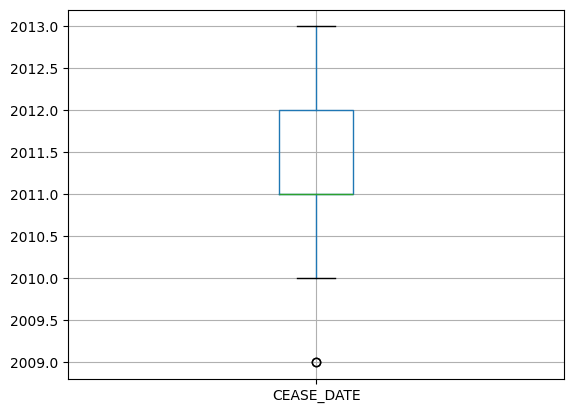

In [32]:
tafe_cease_date = tafe_resignations[['CEASE_DATE']].astype(float).sort_values(by='CEASE_DATE')
# boxplot = tafe_resignations.boxplot(column='CEASE_DATE')
# boxplot
tafe_cease_date.boxplot(column='CEASE_DATE')
plt.show()

From the above boxplot, we can see, 2009 can be an outlier, and it Is okay to remove the Data from this year.Yet, we won't make any changes, but, keep it as same to analyz

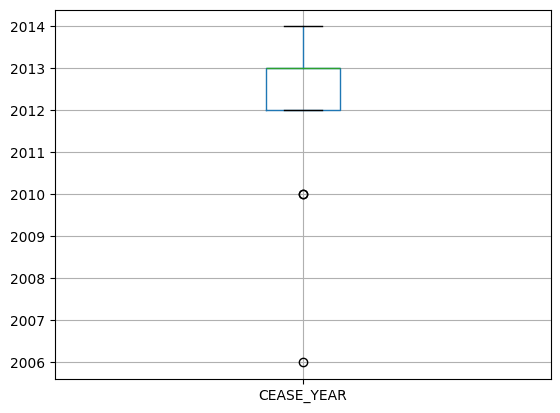

In [33]:
dete_cease_date = dete_resignations[['CEASE_DATE']]

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # Disables the warning

dete_cease_date.loc[:, 'CEASE_YEAR'] = dete_cease_date['CEASE_DATE'].str.split('/').str[-1].astype(float).sort_index()
dete_cease_date.boxplot(column='CEASE_YEAR')
plt.show()

# dete_cease_date.head()
# dete_cease_date.info()
# dete_cease_date['CEASE_DATE'].value_counts()

# Updates in Dete Survey<a id="update"></a>

We have `INSTITUTE_SERVICE` column, which represent the total time of being employed or in a service, for tafe_resignations, but, don't have for dete_resignations dataset. As we are working with both dataset together later on, updating a column in dete_resignations for the same would be a plus point in our analysis.

In [34]:
dete_resignations.head(3)

,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,WORK_LIFE_BALANCE,WORKLOAD,NONE_OF_THE_ABOVE,GENDER,AGE,ABORIGINAL,TORRES_STRAIT,SOUTH_SEA,DISABILITY,NESB
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [35]:
# creating new column in dete_resignations['INSTITUTE_SERVICE']

dete_resignations['INSTITUTE_SERVICE'] = dete_resignations['CEASE_DATE'].str.split('/').str[-1].astype(float) - dete_resignations['DETE_START_DATE'].astype(float)
# to calculate total time period of employee in service

In [36]:
dete_resignations['INSTITUTE_SERVICE'].value_counts()

INSTITUTE_SERVICE
5.0     23
1.0     22
0.0     20
3.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
14.0     6
17.0     6
12.0     6
22.0     6
16.0     5
18.0     5
23.0     4
24.0     4
11.0     4
19.0     3
32.0     3
39.0     3
21.0     3
30.0     2
26.0     2
36.0     2
25.0     2
28.0     2
35.0     1
38.0     1
49.0     1
33.0     1
27.0     1
41.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: count, dtype: int64

It seems 23 people that is highest in number to leave the work after 5 years of their service in an organization. Yet, the number is similar to the people who worked only for 1 years or so, ie 22 who left the work.

The people who worked more than 8 years in a company are few in numbers to leave the company after all. However, the trends seems to change in the latest scenario, where people are not stable for longer period of time. Employees who left the company in early phase or before 8 years of period, are more in numbers. 

# Identifying Dissatisfied Employees<a id="dissatified"></a>

We are going to look into 
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload 
columns for dete_resignations dataset to find `dissatisfied employees`.

We are going to look into `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns for tafe_resignations for looking into dissatisfied employees.



In [37]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID                                                   340 non-null    float64
 1   INSTITUTE                                            340 non-null    object 
 2   WORKAREA                                             340 non-null    object 
 3   CEASE_DATE                                           335 non-null    float64
 4   SEPARATIONTYPE                                       340 non-null    object 
 5   CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR    332 non-null    object 
 6   CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR   332 non-null    object 
 7   CONTRIBUTING FACTORS. CAREER MOVE - SELF-EMPLOYMENT  332 non-null    object 
 8   CONTRIBUTING FACTORS. ILL HEALTH                     332 non-null    object

In [38]:
tafe_resignations['CONTRIBUTING FACTORS. DISSATISFACTION'].value_counts()

CONTRIBUTING FACTORS. DISSATISFACTION
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [39]:
tafe_resignations['CONTRIBUTING FACTORS. DISSATISFACTION'].isnull().sum()

np.int64(8)

In [40]:
tafe_resignations.shape

(340, 23)

In [41]:
tafe_resignations['CONTRIBUTING FACTORS. DISSATISFACTION'].head()

3    -
4    -
5    -
6    -
7    -
Name: CONTRIBUTING FACTORS. DISSATISFACTION, dtype: object

For the `CONTRIBUTING FACTORS. DISSATISFACTION` column for tafe_resignations:

We can see that there are 55 values present for 'Contributing Factors. Dissatisfaction', while 277 values for '-' character, with no values. And we have 8 values that are np.nan or NaN.

In [42]:
tafe_resignations['CONTRIBUTING FACTORS. JOB DISSATISFACTION'].value_counts()

CONTRIBUTING FACTORS. JOB DISSATISFACTION
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [43]:
tafe_resignations.shape

(340, 23)

In [44]:
tafe_resignations['CONTRIBUTING FACTORS. JOB DISSATISFACTION'].isnull().sum()

np.int64(8)

For the 'CONTRIBUTING FACTORS. JOB DISSATISFACTION' column in tafe_resignations:

We have only 62 with value `Contributing Factors. Job Dissatisfaction`, while 270 with '-' character value, and 8 values which are null, or NaN

Now we will updated these values as True, False, or NaN only and put them into a new column 'DISSATISFIED'.

In [45]:
def update_vals(val):
#     create a function to map values in a series
    if pd.isnull(val):
#         if the value in the column is NaN
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    

# tafe_resignations['DISSATISFIED'] = tafe_resignations[['CONTRIBUTING FACTORS. DISSATISFACTION', 'CONTRIBUTING FACTORS. JOB DISSATISFACTION']].map(update_vals).any(axis=1)
# any() Function Acts as the Logic OR
# Either write in one line like this or as follows:

tafe_resignations['DISSATISFIED'] = tafe_resignations['CONTRIBUTING FACTORS. DISSATISFACTION'].map(update_vals)
tafe_resignations['DISSATISFIED'] = tafe_resignations['CONTRIBUTING FACTORS. JOB DISSATISFACTION'].map(update_vals)
tafe_resignations['DISSATISFIED'].head()

# tafe_resignations.head()


3    False
4    False
5    False
6    False
7    False
Name: DISSATISFIED, dtype: object

In [46]:
# We will keep the new dataframe in a new variable

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.head()

,ID,INSTITUTE,WORKAREA,CEASE_DATE,SEPARATIONTYPE,CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR,CONTRIBUTING FACTORS. CAREER MOVE - SELF-EMPLOYMENT,CONTRIBUTING FACTORS. ILL HEALTH,CONTRIBUTING FACTORS. MATERNITY/FAMILY,...,CONTRIBUTING FACTORS. TRAVEL,CONTRIBUTING FACTORS. OTHER,CONTRIBUTING FACTORS. NONE,GENDER,AGE,EMPLOYMENT_STATUS,POSITION,INSTITUTE_SERVICE,ROLE_SERVICE,DISSATISFIED
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [47]:
tafe_resignations_up['DISSATISFIED'].value_counts()

DISSATISFIED
False    270
True      62
Name: count, dtype: int64

In [48]:
tafe_resignations_up['DISSATISFIED'].isnull().sum()

np.int64(8)

For dete_resignations finding dissatisfied employees

In [49]:
dete_resignations['WORKLOAD']
# FOR EXAMPLE, WE WILL BE WORKING WITH BOOLEAN VALUES EITHER TRUE OR FALSE

3      False
5      False
8      False
9      False
11     False
       ...  
808    False
815    False
816    False
819    False
821    False
Name: WORKLOAD, Length: 311, dtype: bool

In [50]:
# Creating new column 'DISSATISFIED' in dete_resignations
dete_resignations['DISSATISFIED'] = dete_resignations[['JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT', 'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION', 'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS', 'WORK_LIFE_BALANCE', 'WORKLOAD']].any(axis=1, skipna=False)
# any() function will return True if any value of Either columns gives True value
# We need not use map(), since we are only working with boolean values, And any() function is enough to handle this
dete_resignations['DISSATISFIED'].value_counts()

DISSATISFIED
False    162
True     149
Name: count, dtype: int64

In [51]:
# Creating new copy for the dataframe we just updated
dete_resignations_up= dete_resignations.copy()

dete_resignations_up['DISSATISFIED'].value_counts()

DISSATISFIED
False    162
True     149
Name: count, dtype: int64

We have two new dataframes to work with `dete_resignations_up` and `tafe_resignations_up`, 
In both dataframes, we created new column, `DISSATISFIED`, which Keeps bool values True or False. Here we identified dissatisfied employees for True values in the `DISSATISFIED` column.

# CombinIng the data <a id="combine"></a>

Here we will combine the data sets `dete_resignations_up` and `tafe_resignations_up` and start analyzing by looking into a single dataset.
First, we will create a new column, `INSTITUTE` for both datasets and add values `DETE` and `TAFE` for respective data sets for distinguishing the datasets after we combine.

In [52]:
# creating a new column for dete_resignations_up
dete_resignations_up['INSTITUTE'] = 'DETE'

# creating a new column for tafe_resignations_up
tafe_resignations_up['INSTITUTE'] = 'TAFE'

In [53]:
# combining both data sets now
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, join='outer', axis=0)
combined.head()

,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,CONTRIBUTING FACTORS. ILL HEALTH,CONTRIBUTING FACTORS. MATERNITY/FAMILY,CONTRIBUTING FACTORS. DISSATISFACTION,CONTRIBUTING FACTORS. JOB DISSATISFACTION,CONTRIBUTING FACTORS. INTERPERSONAL CONFLICT,CONTRIBUTING FACTORS. STUDY,CONTRIBUTING FACTORS. TRAVEL,CONTRIBUTING FACTORS. OTHER,CONTRIBUTING FACTORS. NONE,ROLE_SERVICE
0,4.0,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID                                                   651 non-null    float64
 1   SEPARATIONTYPE                                       651 non-null    object 
 2   CEASE_DATE                                           635 non-null    object 
 3   DETE_START_DATE                                      283 non-null    float64
 4   ROLE_START_DATE                                      271 non-null    float64
 5   POSITION                                             598 non-null    object 
 6   CLASSIFICATION                                       161 non-null    object 
 7   REGION                                               265 non-null    object 
 8   BUSINESS_UNIT                                        32 non-null     o

In [55]:
combined.shape

(651, 52)

In [56]:
combined.notnull().sum().sort_values()
# we have in total 651 rows, and if there are non-null values in any columns less than 500
# we drop them, or remove the column
# this means, all the columns must have atleast 500 or more values that are not null

TORRES_STRAIT                                            0
SOUTH_SEA                                                3
ABORIGINAL                                               7
DISABILITY                                               8
NESB                                                     9
BUSINESS_UNIT                                           32
CLASSIFICATION                                         161
REGION                                                 265
ROLE_START_DATE                                        271
DETE_START_DATE                                        283
ROLE_SERVICE                                           290
MATERNITY/FAMILY                                       311
DISSATISFACTION_WITH_THE_DEPARTMENT                    311
JOB_DISSATISFACTION                                    311
PHYSICAL_WORK_ENVIRONMENT                              311
INTERPERSONAL_CONFLICTS                                311
ILL_HEALTH                                             3

In [57]:
# we will create a new dataset to create the updated version
combined_updated = combined.dropna(axis=1, thresh=500)
# we have thresh hold of at least 500, and the columns below 500 entries are dropped
combined_updated.shape

(651, 10)

In [58]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 651 non-null    float64
 1   SEPARATIONTYPE     651 non-null    object 
 2   CEASE_DATE         635 non-null    object 
 3   POSITION           598 non-null    object 
 4   EMPLOYMENT_STATUS  597 non-null    object 
 5   GENDER             592 non-null    object 
 6   AGE                596 non-null    object 
 7   INSTITUTE_SERVICE  563 non-null    object 
 8   DISSATISFIED       643 non-null    object 
 9   INSTITUTE          651 non-null    object 
dtypes: float64(1), object(9)
memory usage: 51.0+ KB


We have now `combined_updated` dataset to work with, and we have dropped/removed all the columns that have non-null values less than 500. 
We are now left with 651 entries and only 10 columns to work with.

# Cleaning the Service Column <a id="service"></a>

In [59]:
combined_updated['INSTITUTE_SERVICE'].value_counts(dropna=False).sort_values()

INSTITUTE_SERVICE
35.0                   1
38.0                   1
33.0                   1
29.0                   1
34.0                   1
27.0                   1
42.0                   1
31.0                   1
49.0                   1
41.0                   1
30.0                   2
26.0                   2
28.0                   2
36.0                   2
25.0                   2
39.0                   3
32.0                   3
19.0                   3
21.0                   3
23.0                   4
24.0                   4
11.0                   4
16.0                   5
18.0                   5
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
20.0                   7
15.0                   7
13.0                   8
8.0                    8
More than 20 years    10
7.0                   13
9.0                   14
2.0                   14
4.0                   16
6.0                   17
3.0    

As we can see unorganized form of data present in the column, we will now categorize the data into four groups as follow:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [60]:
# We need to extract years of service from each value in INSTITUTE_SERVICE column
# first convert the column into string, to have vectorized operation for string work
combined_updated['INSTITUTE_SERVICE'] = combined_updated['INSTITUTE_SERVICE'].astype(str)

In [61]:
combined_updated['INSTITUTE_SERVICE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 651 entries, 0 to 650
Series name: INSTITUTE_SERVICE
Non-Null Count  Dtype 
--------------  ----- 
651 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [62]:
# now extracting digits only and adding into new updated column
combined_updated['INSTITUTE_SERVICE_UP'] = combined_updated['INSTITUTE_SERVICE'].str.extract(pat=r'(\d+)').astype(float)
# the regular expression captures one or more digits
# and converting into float
combined_updated['INSTITUTE_SERVICE_UP'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 651 entries, 0 to 650
Series name: INSTITUTE_SERVICE_UP
Non-Null Count  Dtype  
--------------  -----  
563 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [63]:
combined_updated['INSTITUTE_SERVICE_UP'].value_counts(dropna=False).sort_values()

INSTITUTE_SERVICE_UP
29.0      1
42.0      1
27.0      1
41.0      1
33.0      1
49.0      1
34.0      1
31.0      1
38.0      1
35.0      1
25.0      2
36.0      2
26.0      2
28.0      2
30.0      2
21.0      3
32.0      3
39.0      3
19.0      3
23.0      4
24.0      4
16.0      5
18.0      5
14.0      6
12.0      6
22.0      6
10.0      6
17.0      6
15.0      7
8.0       8
13.0      8
2.0      14
9.0      14
4.0      16
6.0      17
20.0     17
0.0      20
11.0     30
7.0      34
5.0      56
3.0      83
NaN      88
1.0     159
Name: count, dtype: int64

In [64]:
def catapply(year):
#     creating a function to apply our condition since we don't have any
# other vectorized methods
    if year < 3:
        return 'New'
    elif year <= 6:
        return 'Experienced'
    elif year <= 10:
        return 'Established'
    elif year >= 11:
        return 'Veteran'
    

# we will apply the method to create a new column SERVICE_CAT

In [65]:
# CREATING NEW COLUMN AND PUTTING VALUES BASED ON OUR CONDITION
combined_updated['SERVICE_CAT'] = combined_updated['INSTITUTE_SERVICE_UP'].apply(catapply)

combined_updated['SERVICE_CAT'].value_counts(dropna=False)

SERVICE_CAT
New            193
Experienced    172
Veteran        136
None            88
Established     62
Name: count, dtype: int64

Now, we are at the cross roads, and we know what to do next as we are heading towards our final analysis. 
It seems, `New` category holds more weight, thus, it must be true that more new employees are leaving the company soon who are dissatisfied with their job.

The `Established` employees are lesser in numbers than other types to leave the work for dissatisfaction reasons.

# What we found!<a id="findings"></a>

We will begin our analysis after some cleanings of data. We will look into `DISSATISFIED` column for this, and see if there are any missing values. Since we know that there are some null values along with the Boolean values, its good to go for cleaning the null entries. 
Then, we will aggregate the values with their mean to calculate a proper result we need along with data visualization.

In [66]:
combined_updated['DISSATISFIED'].value_counts(dropna=False)

DISSATISFIED
False    432
True     211
NaN        8
Name: count, dtype: int64

In [77]:
# we will replace the 8 NaN values with boolean False as it is high in number
combined_updated['DISSATISFIED'] = combined_updated['DISSATISFIED'].fillna(value=False)

combined_updated['DISSATISFIED'].value_counts(dropna=False)

DISSATISFIED
False    440
True     211
Name: count, dtype: int64

Now we will create a pivot_table for `SERVICE_CAT` column, by aggregating by mean, as the Boolean values are now are taken for 0 or 1 in pivot_table.

In [68]:
service_cat_pv = combined_updated.pivot_table(index='SERVICE_CAT', values='DISSATISFIED', aggfunc='mean')
service_cat_pv

,DISSATISFIED
SERVICE_CAT,
Established,0.500000
Experienced,0.296512
New,0.248705
Veteran,0.455882


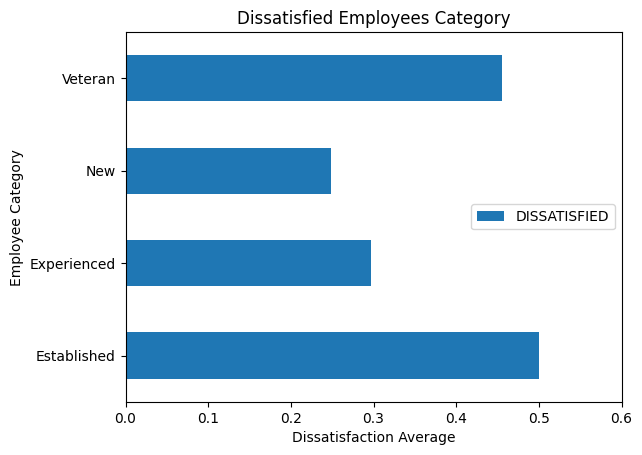

In [69]:
# we now have the mean values which we can work with the visualization now
%matplotlib inline

service_cat_pv.plot(kind='barh', ylabel='Employee Category', xlabel='Dissatisfaction Average', xlim=(0, 0.6), title="Dissatisfied Employees Category")
plt.show()


Now, we can assume that, 50 percent of Established employees are dissatisfied to leave the work. 
20-26 percents of new and experienced are seen to have the dissatisfaction to leave the work. And, almost 50 percent of veterans are leaving work with dissatisfaction. 
The finding suggest, the more employee are working for a longer period of time, the more, they leave the work because of their dissatisfaction at the work. 
Yet, it is not that new and experienced ones are lesser dissatisfied. But, the reason could still be true for the majority of them to have the dissatisfaction because of the rates at they are leaving the work.


# Dissatisfaction based on the AGE_FACTOR<a id="age"></a>

In [70]:
combined_updated['AGE'].value_counts().sort_values()

AGE
20 or younger    10
61 or older      23
56-60            26
56 or older      29
21-25            29
31-35            29
26  30           32
31  35           32
36  40           32
21  25           33
26-30            35
46  50           39
36-40            41
46-50            42
41  45           45
41-45            48
51-55            71
Name: count, dtype: int64

In [71]:
combined_updated[['AGE']]

,AGE
0,36-40
1,41-45
2,31-35
3,46-50
4,31-35
...,...
646,21 25
647,51-55
648,NaN
649,51-55


In [72]:
# We wil look into AGE column to analyze now
# We will be creating different Age groups

# Firstly, lets clean the data
combined_updated['AGE'] = combined_updated['AGE'].str.split('-').str[0]

combined_updated['AGE'] = combined_updated['AGE'].str.split(' ').str[0]

combined_updated['AGE'] = combined_updated['AGE'].str.split(' or ').str[0]

combined_updated['AGE'] = combined_updated['AGE'].astype(float)

combined_updated['AGE'].value_counts(dropna=False)


AGE
41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: count, dtype: int64

In [73]:
combined_updated[(combined_updated['AGE']>=20) & (combined_updated['AGE']<30)]

,ID,SEPARATIONTYPE,CEASE_DATE,POSITION,EMPLOYMENT_STATUS,GENDER,AGE,INSTITUTE_SERVICE,DISSATISFIED,INSTITUTE,INSTITUTE_SERVICE_UP,SERVICE_CAT
13,2.800000e+01,Resignation,2012,Public Servant,Permanent Full-time,Female,21.0,7.0,False,DETE,7.0,Established
16,3.800000e+01,Resignation,2012,Teacher Aide,Temporary Part-time,Female,21.0,1.0,False,DETE,1.0,New
17,4.000000e+01,Resignation,2012,Teacher,Permanent Full-time,Female,21.0,nan,True,DETE,NaN,None
22,4.900000e+01,Resignation,2012,Cleaner,Permanent Full-time,Male,21.0,3.0,False,DETE,3.0,Experienced
23,5.100000e+01,Resignation,2012,Cleaner,Permanent Full-time,Male,21.0,3.0,False,DETE,3.0,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...
635,6.350357e+17,Resignation,2013.0,Administration (AO),Permanent Part-time,Female,26.0,Less than 1 year,False,TAFE,1.0,New
638,6.350402e+17,Resignation,2013.0,Technical Officer (TO),Temporary Full-time,Female,26.0,1-2,True,TAFE,1.0,New
644,6.350599e+17,Resignation,2013.0,Administration (AO),Temporary Full-time,Female,26.0,1-2,False,TAFE,1.0,New
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21.0,5-6,False,TAFE,5.0,Experienced


We will apply this method to all the rows and create a separate column to store the age category based on the age factor.

In [74]:
def applyage(age):
    if pd.isnull(age):
        return "Unspecified"
    elif age >= 20 and age < 30:
        return "20's"
    elif age >= 30 and age < 40:
        return "30's"
    elif age >= 40 and age < 50:
        return "40's"
    elif age >= 50 and age < 60:
        return "50's"
    elif age >= 60:
        return "60's"

We will create `AGE_FACTOR` new column Based on the applyage().

In [76]:
combined_updated['AGE_FACTOR'] = combined_updated['AGE'].apply(applyage)
combined_updated['AGE_FACTOR'].value_counts(dropna=False)

AGE_FACTOR
40's           174
20's           139
30's           134
50's           126
Unspecified     55
60's            23
Name: count, dtype: int64

In [83]:
# Creating a pivot table for aggregating dissatisfied groups based on age factor
age_factor_pv = combined_updated.pivot_table(index='AGE_FACTOR', values='DISSATISFIED', aggfunc = 'mean')
age_factor_pv

,DISSATISFIED
AGE_FACTOR,
20's,0.323741
30's,0.320896
40's,0.333333
50's,0.365079
60's,0.521739
Unspecified,0.127273


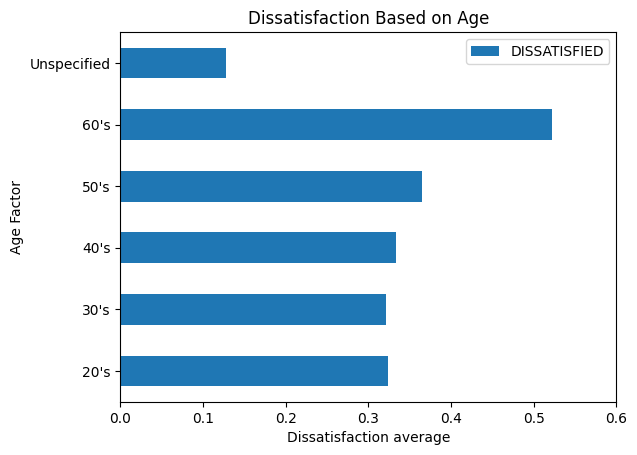

In [89]:
%matplotlib inline

age_factor_pv.plot(kind='barh', xlabel="Dissatisfaction average", ylabel="Age Factor", xlim=(0, 0.6), title="Dissatisfaction Based on Age")
plt.show()

# Conclusion <a id="conclude"></a>

We can conclude that there is a more rate of dissatisfaction in the People in their 60's, as they could also be the ones who are Established in their career. Nevertheless, overall Age groups, other than 60's and unspecified groups represent simliar Level of dissatisfaction too.